# Given

MNIST - a prerpocessed dataset of handwritten digits from 0 to 1, decoded in a matrix 20x20 flattened into 400 attributes.

Flattened preprocessed dataset:

| x1   | x2    | ... | x400 | y - Written number |
| ----------------| ------------------------ | ------------------------ | ------------------------ | ------------------------ |
| 3 | 1 | ...   | 0 | 0 |
| 1    | 0 | ...    | 1 | 1 |
| ...    | ... | ...    | ... | ... |


# Find

Using TensorFlow model and calculate the weights. Use these weights to replicate forward propagation in numpy.
Prove both models function the same by predicting similar values.


Use these TensorFlow model parameters:
   - Activation = sigmoid
   - Optimizator = Adam(learning_rate = 0.001)
   - Loss = BinaryCrossentropy
   - 2 sigmoid layers [x25->x15->x1]
   - Epochs = 10
   - <b>[0-10] recognition is discussed later</b>

# Solution

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

2023-10-24 18:05:15.178632: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Inputs

In [3]:
x = np.load("handwritten_X.npy")
y = np.load("handwritten_Y.npy")

x = x[:1000,:] # only 0 and 1
y = y[:1000,:]

x.shape, y.shape

((1000, 400), (1000, 1))

Examples

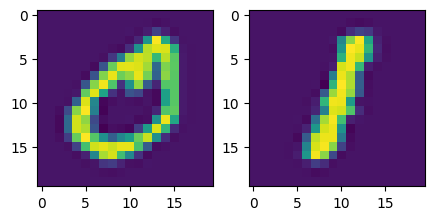

In [4]:
example0 = np.reshape(x[1],(20,20), order='F')
example1 = np.reshape(x[900],(20,20), order='F')

fig, ax = plt.subplots(1, 2, figsize=(5,4))
ax[0].imshow(example0)
ax[1].imshow(example1)

### Generate weights using Tensorflow Model

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 25, activation="sigmoid", input_dim=400, name="L1"), 
    tf.keras.layers.Dense(units = 15, activation="sigmoid", name = "L2"),
    tf.keras.layers.Dense(units = 1, activation="sigmoid", name = "L_out"),
])

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = tf.keras.losses.BinaryCrossentropy()
)

model.fit(x,y,epochs=10)

Epoch 1/10
32/32 [==============================] - 1s 2ms/step - loss: 0.6701
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 0.5275
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 0.3841
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 0.2675
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 0.1922
Epoch 6/10
32/32 [==============================] - 0s 3ms/step - loss: 0.1451
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 0.1140
Epoch 8/10
32/32 [==============================] - 0s 3ms/step - loss: 0.0932
Epoch 9/10
32/32 [==============================] - 0s 3ms/step - loss: 0.0780
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 0.0666


Print weights

In [6]:
l1_w, l1_b = model.get_layer("L1").get_weights()
l2_w, l2_b = model.get_layer("L2").get_weights()
l3_w, l3_b  = model.get_layer("L_out").get_weights()

print(f"input: {x.shape}")
print(f"l1_w: {l1_w.shape}, l1_b: {l1_b.shape} \n l2_w: {l2_w.shape}, l2_b: {l2_b.shape} \n l3_w: {l3_w.shape}, l3_b: {l3_b.shape}")

input: (1000, 400)
l1_w: (400, 25), l1_b: (25,) 
 l2_w: (25, 15), l2_b: (15,) 
 l3_w: (15, 1), l3_b: (1,)


L1 calculation:

$$
\overset{\text{Inputs}}{%
    \begin{pmatrix}
    a_{1,1} & a_{1,2} & a_{1,3} & a_{1,4} & \dots & a_{1,400} \\
    a_{2,1} & a_{2,2} & a_{2,3} & a_{2,4}  & \dots & a_{2,400} \\
    a_{3,1} & a_{3,2} & a_{3,3} & a_{3,4}  & \dots & a_{3,400} \\
    a_{4,1} & a_{4,2} & a_{4,3} & a_{4,4}  & \dots & a_{4,400} \\
    a_{5,1} & a_{5,2} & a_{5,3} & a_{5,4}  & \dots & a_{5,400} \\
    \vdots & \vdots & \cdots & \vdots & \ddots & \vdots \\
    a_{1000,1} & a_{1000,2} & a_{1000,3} & a_{1000,4}  & \dots & a_{1000,400} \\
    \end{pmatrix}
}
\cdot
\overset{\text{L1 weights}}{%
    \begin{pmatrix}
    a_{1,1} & a_{1,2} & \dots & a_{1,25} \\
    a_{2,1} & a_{2,2} & \dots & a_{2,25} \\
    a_{3,1} & a_{3,2} & \dots & a_{3,25} \\
    a_{4,1} & a_{4,2} & \dots & a_{4,25} \\
    \vdots & \vdots & \ddots & \vdots \\
    a_{400,1} & a_{400,2} & \dots & a_{400,25} \\
    \end{pmatrix}
}
+
\overset{\text{L1 bias}}{%
    \begin{pmatrix}
    a_{1,1} & a_{1,2} & \dots & a_{1,25} \\
    \end{pmatrix}
}
=
\overset{\text{L1 output}}{%
    \begin{pmatrix}
    a_{1,1} & a_{1,2} & \dots & a_{1,25} \\
    a_{2,1} & a_{2,2} & \dots & a_{2,25} \\
    a_{3,1} & a_{3,2} & \dots & a_{3,25} \\
    a_{4,1} & a_{4,2} & \dots & a_{4,25} \\
    a_{5,1} & a_{5,2} & \dots & a_{5,25} \\
    \vdots & \vdots & \ddots & \vdots \\
    a_{1000,1} & a_{1000,2} & \dots & a_{1000,25} \\
    \end{pmatrix}
}
$$

L2 calculation:

$$
\overset{\text{L1 output}}{%
    \begin{pmatrix}
    a_{1,1} & a_{1,2} & \dots & a_{1,25} \\
    a_{2,1} & a_{2,2} & \dots & a_{2,25} \\
    a_{3,1} & a_{3,2} & \dots & a_{3,25} \\
    a_{4,1} & a_{4,2} & \dots & a_{4,25} \\
    a_{5,1} & a_{5,2} & \dots & a_{5,25} \\
    \vdots & \vdots & \ddots & \vdots \\
    a_{1000,1} & a_{1000,2} & \dots & a_{1000,25} \\
    \end{pmatrix} \\
}
\overset{\text{L2 weights}}{%
    \begin{pmatrix}
    a_{1,1} & a_{1,2} & \dots & a_{1,15} \\
    a_{2,1} & a_{2,2} & \dots & a_{2,15} \\
    a_{3,1} & a_{3,2} & \dots & a_{3,15} \\
    a_{4,1} & a_{4,2} & \dots & a_{4,15} \\
    \vdots & \vdots & \ddots & \vdots \\
    a_{25,1} & a_{25,2} & \dots & a_{25,15} \\
    \end{pmatrix} \\
}
+
\overset{\text{L2 bias}}{%
    \begin{pmatrix}
    a_{1,1} & a_{1,2} & \dots & a_{1,15} \\
    \end{pmatrix} \\
}
\overset{\text{L2 output}}{%
\begin{pmatrix}
a_{1,1} & a_{1,2} & \dots & a_{1,15} \\
a_{2,1} & a_{2,2} & \dots & a_{2,15} \\
a_{3,1} & a_{3,2} & \dots & a_{3,15} \\
a_{4,1} & a_{4,2} & \dots & a_{4,15} \\
a_{5,1} & a_{5,2} & \dots & a_{5,15} \\
\vdots & \vdots & \ddots & \vdots \\
a_{1000,1} & a_{1000,2} & \dots & a_{1000,15} \\
\end{pmatrix}
}
$$


L3 calculation:

$$
\overset{\text{L2 output}}{
\begin{pmatrix} 
a_{1,1} & a_{1,2} & \dots & a_{1,15} \\
a_{2,1} & a_{2,2} & \dots & a_{2,15} \\
a_{3,1} & a_{3,2} & \dots & a_{3,15} \\
a_{4,1} & a_{4,2} & \dots & a_{4,15} \\
a_{5,1} & a_{5,2} & \dots & a_{5,15} \\
\vdots & \vdots & \ddots & \vdots \\
a_{1000,1} & a_{1000,2} & \dots & a_{1000,15} \\
\end{pmatrix}}
\cdot
\overset{\text{L3 weights}}{
\begin{pmatrix}
a_{1,1} \\
a_{2,1} \\
a_{3,1} \\
a_{4,1} \\
a_{5,1} \\
\vdots \\
a_{15,1} \\
\end{pmatrix}}
+
\overset{\text{L3 bias}}{%
    a_{1,1}
}
=
\overset{\text{Prediction}}{
\begin{pmatrix}
a_{1,1} \\
a_{2,1} \\
a_{3,1} \\
a_{4,1} \\
a_{5,1} \\
\vdots \\
a_{1000,1} \\
\end{pmatrix}}
vs
\overset{\text{Targets y}}{
\begin{pmatrix}
a_{1,1} \\
a_{2,1} \\
a_{3,1} \\
a_{4,1} \\
a_{5,1} \\
\vdots \\
a_{1000,1} \\
\end{pmatrix}}
$$

### Define model in Numpy

In [7]:
def dense(l_in, w, b):

    f = np.matmul(l_in, w) + b
    sigmoid = 1 / (1 + np.exp(-f))

    return sigmoid

In [8]:
def sequential_recursive(x, weights, biases):

    if len(weights) == 0:
        return x

    current_weights = weights[0]
    current_biases = biases[0]

    next_weights = weights[1:]
    next_biases = biases[1:]

    l_out = dense(x, current_weights, current_biases)

    return sequential_recursive(l_out, next_weights, next_biases)

# Answer

In [9]:
prediction_tf = model.predict(x)
prediction_np = sequential_recursive(x, [l1_w, l2_w, l3_w], [l1_b, l2_b, l3_b])

prediction_vs_actual = pd.DataFrame(np.c_[prediction_tf, prediction_np, prediction_np>0.5, y], columns=["TF","NP","NP>0.5","Actual y"])

32/32 [==============================] - 0s 3ms/step


Prediction

In [10]:
prediction_vs_actual

,TF,NP,NP>0.5,Actual y
0,0.065085,0.065085,0.0,0.0
1,0.066042,0.066042,0.0,0.0
2,0.071879,0.071879,0.0,0.0
3,0.064521,0.064521,0.0,0.0
4,0.061112,0.061112,0.0,0.0
...,...,...,...,...
995,0.962911,0.962911,1.0,1.0
996,0.942389,0.942389,1.0,1.0
997,0.961469,0.961469,1.0,1.0
998,0.962606,0.962606,1.0,1.0


Check the difference between prediction and actual

In [11]:
prediction_vs_actual.loc[prediction_vs_actual["NP>0.5"]!=prediction_vs_actual["Actual y"]]

,TF,NP,NP>0.5,Actual y
142,0.948913,0.948913,1.0,0.0
952,0.352441,0.352441,0.0,1.0


Show the value incorrectly recognized

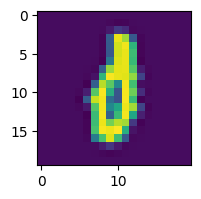

In [12]:
example_diff = np.reshape(x[142],(20,20), order='F')

fig, ax = plt.subplots(figsize=(2,2))
ax.imshow(example_diff)